In [1]:
#let's start by loading the dataset and taking a look at its structure. We'll then proceed with some exploratory data analysis (EDA) to understand the data better and identify any patterns or anomalies that might indicate fraudulent transactions.

#Let's load the dataset and inspect the first few rows.

import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataframe
print(df.info())

# Display summary statistics of the dataframe
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**The dataset has been successfully loaded. Here are some key points from the initial inspection:**

*     The dataset contains 284,807 entries and 31 columns.
*     The columns include features named V1 to V28, along with Time, Amount, and Class.
*     The Class column indicates whether a transaction is fraudulent (1) or not (0).

Let's proceed with some exploratory data analysis (EDA) to understand the distribution of the data and identify any patterns or anomalies that might indicate fraudulent transactions.

First, let's visualize the distribution of the Class column to see the proportion of fraudulent transactions.

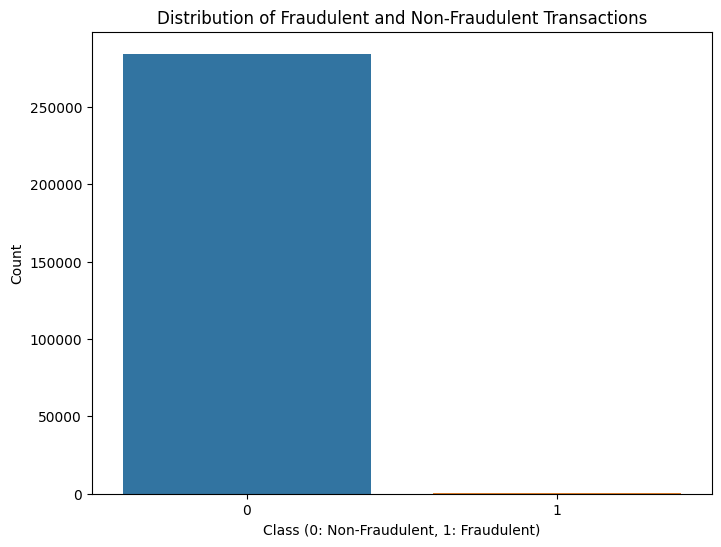

done


In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/creditcardfraud/creditcard.csv'
df = pd.read_csv(file_path)

# Plotting the distribution of the 'Class' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

print('done')

The plot above shows the distribution of fraudulent and non-fraudulent transactions. As we can see, the dataset is highly imbalanced, with a significantly larger number of non-fraudulent transactions compared to fraudulent ones. This is a common scenario in fraud detection datasets.

Next, let's explore the distribution of the Amount column for both classes to see if there are any noticeable differences.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


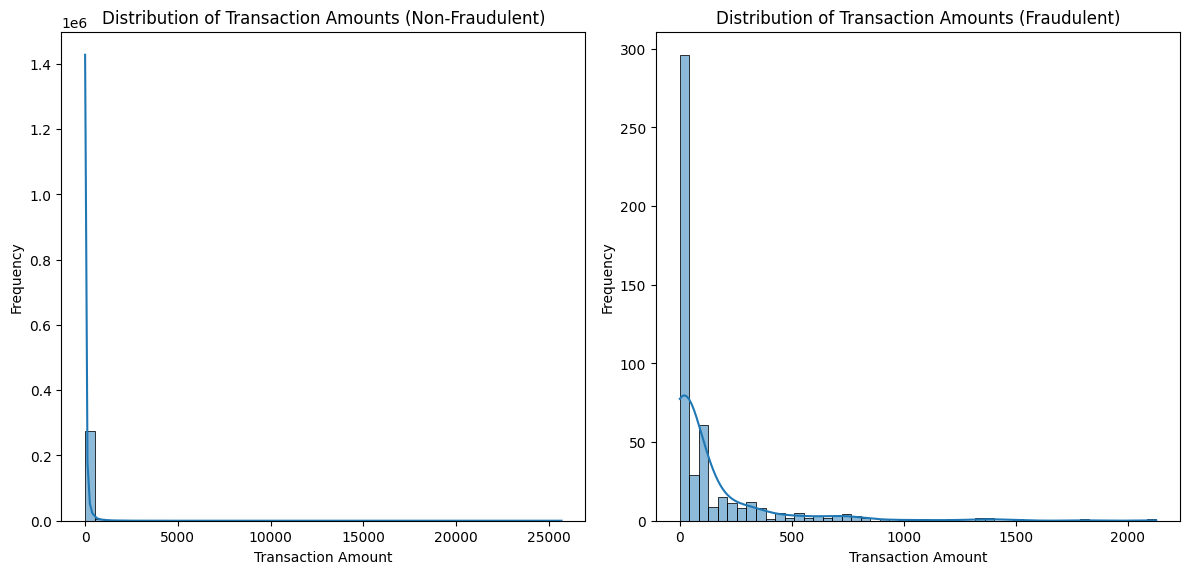

done


In [3]:
# Plotting the distribution of the 'Amount' column for both classes
plt.figure(figsize=(12, 6))

# Non-Fraudulent transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts (Non-Fraudulent)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts (Fraudulent)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print('done')

The plots above show the distribution of transaction amounts for both non-fraudulent and fraudulent transactions. Here are some observations:

*     Non-fraudulent transactions have a wide range of amounts, with a higher frequency of lower amounts.
*     Fraudulent transactions also have a wide range of amounts, but the distribution appears to be more spread out compared to non-fraudulent transactions.

Next, let's explore the correlation between the features to identify any strong relationships that might help in detecting fraudulent transactions.

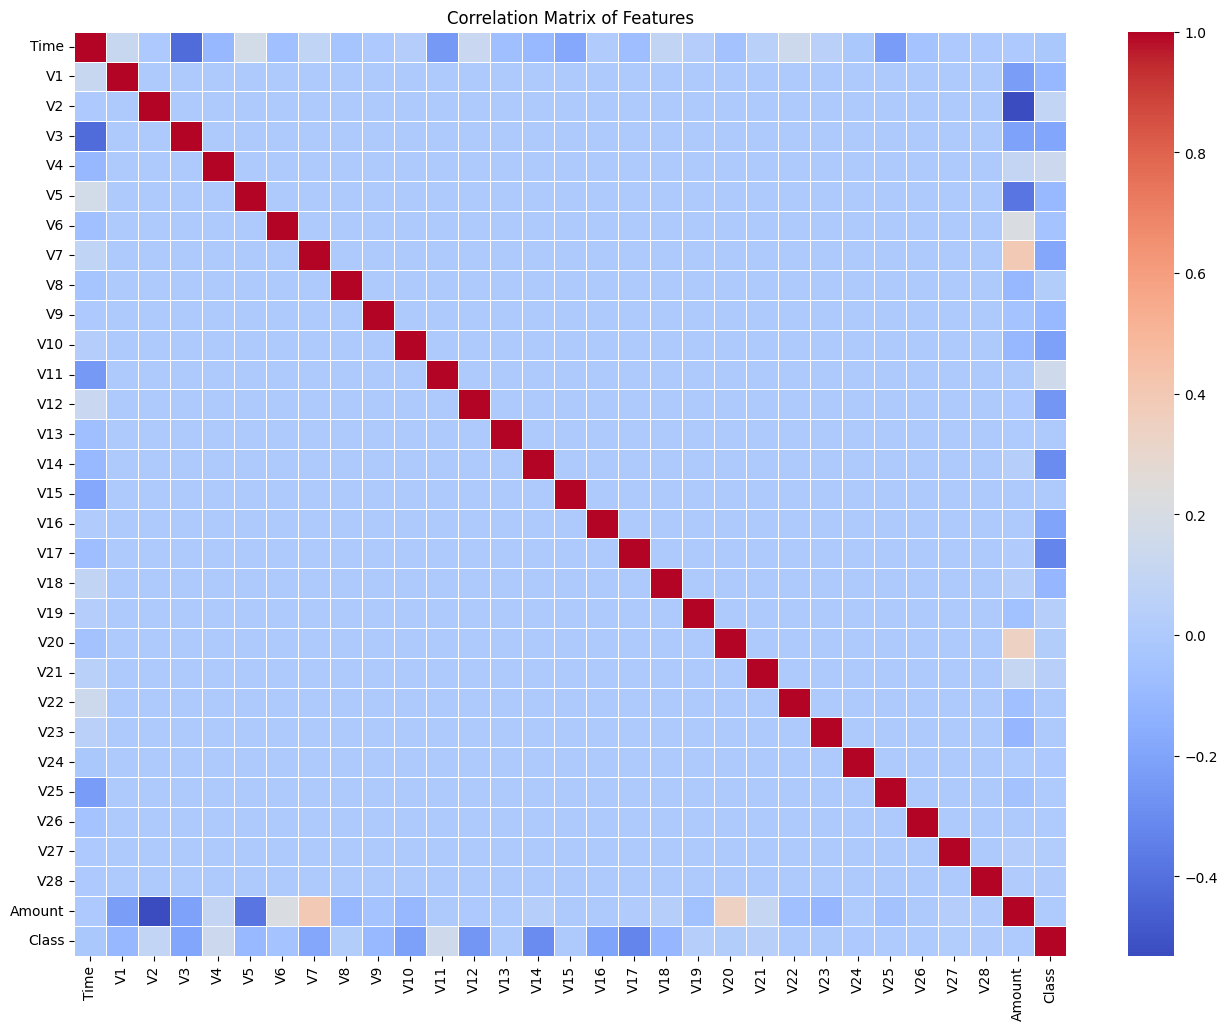

done


In [4]:
# Plotting the correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

print('done')

The correlation matrix above shows the relationships between the features in the dataset. Here are some key points:

*     Most of the features have low correlation with each other, which is expected since the features are principal components resulting from PCA.
*     There are some features with moderate to strong correlations, which might be worth exploring further.


Next, let's perform some feature engineering and prepare the data for modeling. We'll start by scaling the Amount and Time columns, as they are not scaled like the other features.

In [5]:
# Scaling the 'Amount' and 'Time' columns
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataframe to avoid modifying the original data
df_scaled = df.copy()

# Initialize the scaler
scaler = StandardScaler()

# Scale the 'Amount' and 'Time' columns
df_scaled['Amount'] = scaler.fit_transform(df_scaled[['Amount']])
df_scaled['Time'] = scaler.fit_transform(df_scaled[['Time']])

print('done')

done


In [6]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('done')

done


In [7]:
# Building a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print('\
Classification Report:')
print(class_report)

Confusion Matrix:
[[56851    13]
 [   34    64]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

The confusion matrix and classification report above show the performance of the logistic regression model. Here are some key points:

The model has a high precision and recall for the non-fraudulent class (0).

For the fraudulent class (1), the precision is 0.83, and the recall is 0.65, indicating that the model is reasonably good at identifying fraudulent transactions but still misses some.


In [8]:
# Building a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print('Confusion Matrix (Random Forest):')
print(conf_matrix_rf)
print('\
Classification Report (Random Forest):')
print(class_report_rf)

Confusion Matrix (Random Forest):
[[56859     5]
 [   18    80]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

The Random Forest classifier shows improved performance compared to the logistic regression model. Here are some key points:

    The precision for the fraudulent class (1) is 0.94, and the recall is 0.82, indicating better identification of fraudulent transactions.
    The overall accuracy is very high, and the model performs well on both classes.


Let's perform further analysis to understand the feature importance and see which features contribute the most to the model's predictions. This can help us gain insights into the factors that are most indicative of fraudulent transactions.

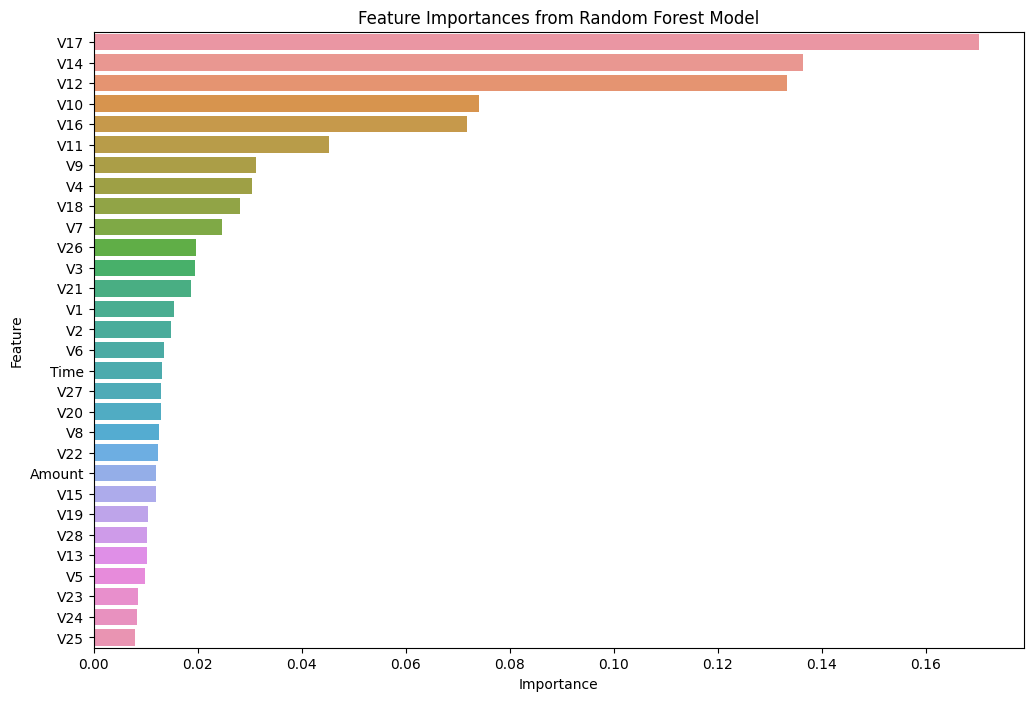

done


In [9]:
# Extracting feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print('done')



The plot above shows the feature importances from the Random Forest model. Here are some key points:

    The most important features are V17, V14, V12, and V10, which have the highest importance scores.
    These features contribute the most to the model's ability to distinguish between fraudulent and non-fraudulent transactions.


The features V17V17, V14V14, V12V12, and V10V10 are among the principal components derived from the original features of the dataset using Principal Component Analysis (PCA). Since PCA transforms the original features into a new set of orthogonal features (principal components), the exact interpretation of these components can be challenging. However, we can still discuss their significance in the context of fraud detection:

**Principal Component Analysis (PCA):**
        
        PCA is a dimensionality reduction technique that transforms the original features into a new set of features called principal components.
        These principal components are linear combinations of the original features and are designed to capture the maximum variance in the data.
        The principal components are orthogonal to each other, meaning they are uncorrelated.

****  Significance of Top Features:****
        
        The top features V17V17, V14V14, V12V12, and V10V10 have the highest importance scores in the Random Forest model, indicating that they contribute the most to the model's ability to distinguish between fraudulent and non-fraudulent transactions.
        These features likely capture patterns and relationships in the data that are indicative of fraudulent behavior. For example, they might represent unusual spending patterns, anomalies in transaction amounts, or other suspicious activities.

**** Interpreting Principal Components:****
        
        While the exact interpretation of each principal component is not straightforward, we can infer that the top features capture critical information related to fraud detection.
        The importance of these features suggests that the underlying patterns they represent are highly relevant for identifying fraudulent transactions.

To gain a deeper understanding of these features, we could analyze the original features that contributed to these principal components. However, this would require access to the original dataset before PCA transformation, which is not available in this case.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

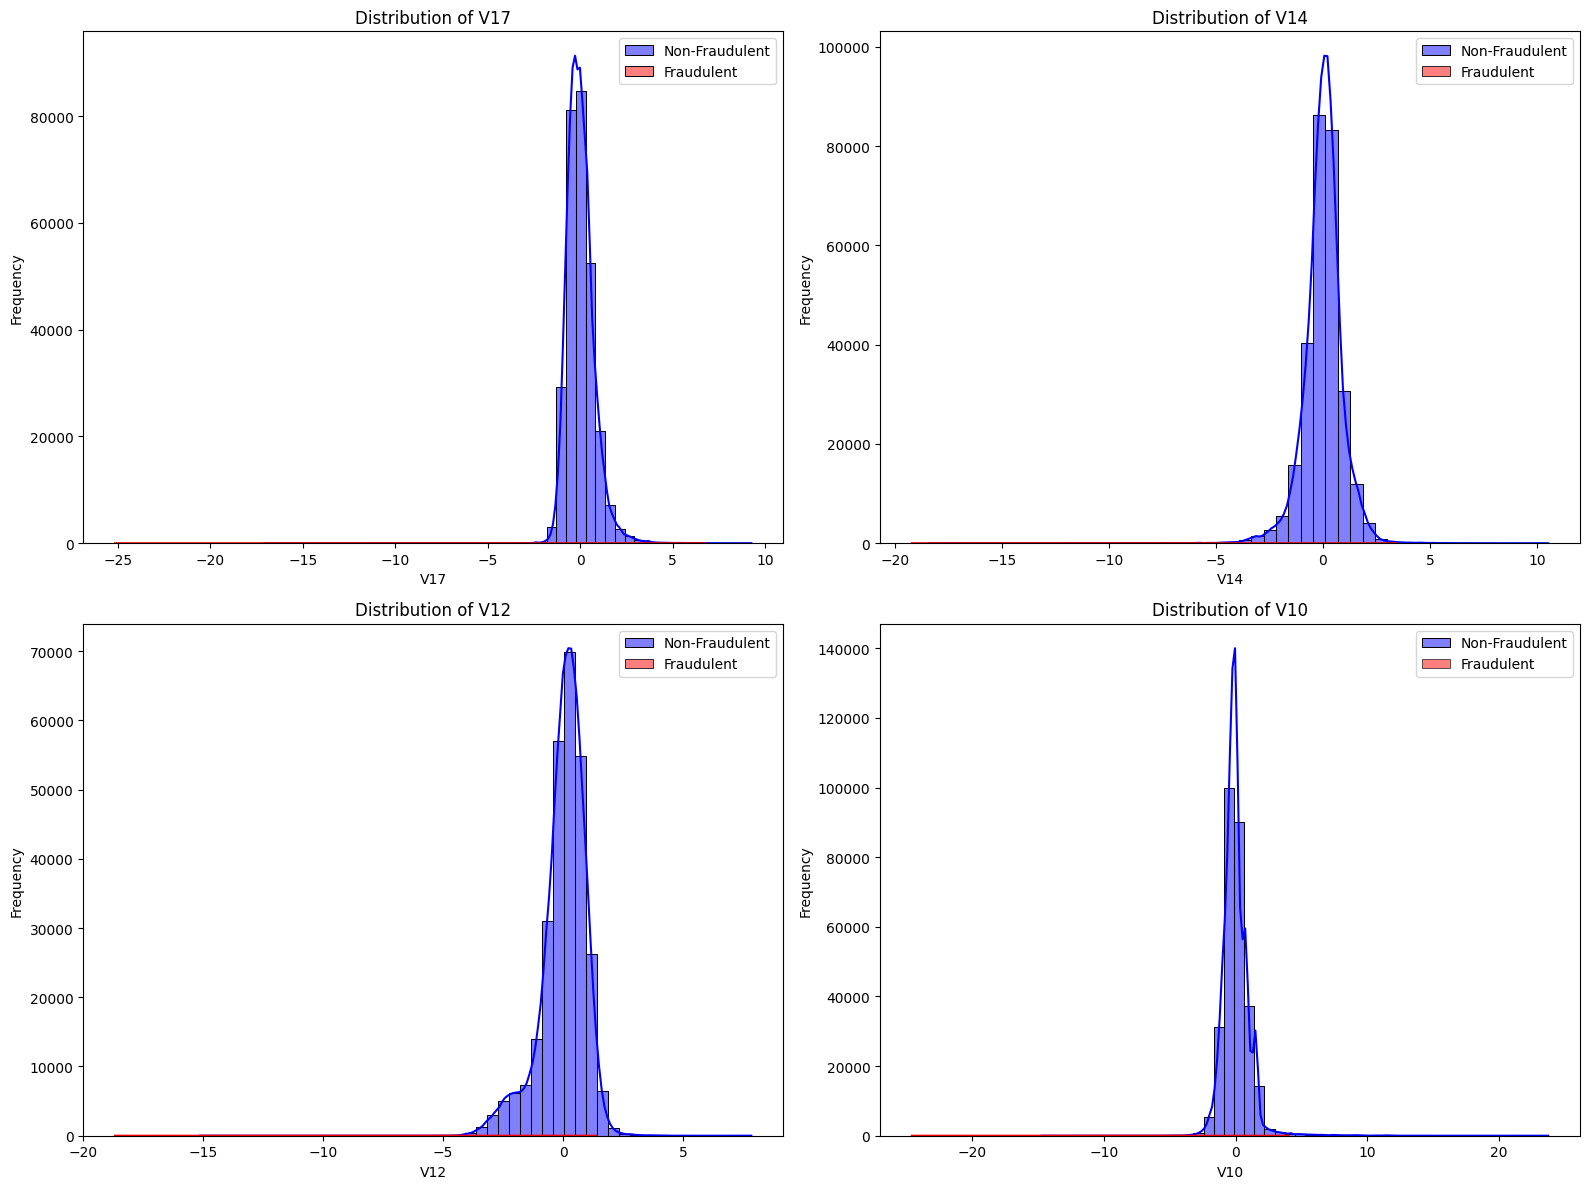

done


In [10]:
# Plotting the distribution of the top features (V17, V14, V12, V10) for both classes
plt.figure(figsize=(16, 12))

# List of top features
top_features = ['V17', 'V14', 'V12', 'V10']

# Plotting each feature
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[df['Class'] == 0][feature], bins=50, kde=True, color='blue', label='Non-Fraudulent')
    sns.histplot(df[df['Class'] == 1][feature], bins=50, kde=True, color='red', label='Fraudulent')
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

print('done')

The plots above show the distribution of the top features (V17V17, V14V14, V12V12, V10V10) for both non-fraudulent and fraudulent transactions. Here are some observations:

    V17V17: The distribution for fraudulent transactions is more spread out and has a different shape compared to non-fraudulent transactions.
    V14V14: There is a noticeable difference in the distribution, with fraudulent transactions having a distinct peak compared to non-fraudulent transactions.
    V12V12: The distribution for fraudulent transactions shows a different pattern compared to non-fraudulent transactions, with a more pronounced peak.
    V10V10: The distribution for fraudulent transactions is more spread out and has a different shape compared to non-fraudulent transactions.

These differences in distribution indicate that these features capture important patterns that help distinguish between fraudulent and non-fraudulent transactions.

